In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import keras
from sklearn.metrics import r2_score

In [5]:
flight_arrivals = pd.read_csv('Arriving Data.csv')
flight_arrivals.drop('NewMsgTime',axis=1,inplace=True)
flight_arrivals.head()

,FltNbr,AircraftType,SchedDepTime,SchedArrTime,BlockArrDate,BlockArrTime,MsgDate,MsgTime,NewMsgDate,BlockDepDate,BlockDepTime,TimeToFly,DepCountry,Error
0,4,321,715,830,231112,838,231112,722,231112,231112,721,60,6,16
1,4,321,715,830,231112,838,231112,733,231112,231112,721,50,6,15
2,4,321,715,830,231112,838,231112,756,231112,231112,721,32,6,10
3,4,321,715,830,231112,838,231112,817,231112,231112,721,19,6,2
4,4,321,715,830,231112,838,231112,824,231112,231112,721,14,6,0


In [6]:
flight_arrivals.drop(['AircraftType','BlockArrTime','DepCountry','BlockArrDate','MsgDate', 'NewMsgDate', 'BlockDepDate'],axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [8]:
# flight_arrivals['AircraftType'] = number.fit_transform(flight_arrivals['AircraftType'])

In [9]:
flight_arrivals.shape

(280332, 7)

In [10]:
mean = flight_arrivals.mean(axis=0)
meanE = flight_arrivals['Error'].mean(axis=0)
stdE = flight_arrivals['Error'].std(axis=0)
flight_arrdata = flight_arrivals - mean
std = flight_arrivals.std(axis=0)
flight_arrdata = flight_arrdata / std

In [11]:
flight_arrdata.shape

(280332, 7)

In [12]:
X = flight_arrdata.drop('Error',axis=1)
y = flight_arrdata['Error']

In [13]:
x = X.as_matrix()
y = y.as_matrix()

C:\Users\viran\AppData\Local\conda\conda\envs\python36_gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\viran\AppData\Local\conda\conda\envs\python36_gpu\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
x_train.shape

(196232, 6)

In [16]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(256,
                           input_shape=(x_train.shape[1],)))
    model.add(keras.layers.PReLU(alpha_initializer='zeros'))
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.PReLU(alpha_initializer='zeros'))
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.PReLU(alpha_initializer='zeros'))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "DNN.h5",
        monitor = 'val_loss',
        save_best_only=True,
    ),
    keras.callbacks.EarlyStopping(
        monitor = 'val_mean_absolute_error',
        patience = 15,
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
    )
#     keras.callbacks.TensorBoard(
#         log_dir="./Model_Logs/Graphs/Arrivals",
#         histogram_freq=1,
#     )
]

model = build_model()

history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Train on 156985 samples, validate on 39247 samples
Epoch 1/100
156985/156985 [==============================] - 6s 40us/step - loss: 0.7273 - mean_absolute_error: 0.2295 - val_loss: 0.7487 - val_mean_absolute_error: 0.2734
Epoch 2/100
156985/156985 [==============================] - 5s 35us/step - loss: 0.5809 - mean_absolute_error: 0.1900 - val_loss: 0.6336 - val_mean_absolute_error: 0.1722
Epoch 3/100
156985/156985 [==============================] - 5s 35us/step - loss: 0.5356 - mean_absolute_error: 0.1622 - val_loss: 0.5853 - val_mean_absolute_error: 0.1425
Epoch 4/100
156985/156985 [==============================] - 6s 36us/step - loss: 0.5055 - mean_absolute_error: 0.1479 - val_loss: 0.6393 - val_mean_absolute_error: 0.1485
Epoch 5/100
156985/156985 [==============================] - 5s 35us/step - loss: 0.5118 - mean_absolute_error: 0.1490 - val_loss: 0.5817 - val_mean_absolute_error: 0.1761
Epoch 6/100
156985/156985 [==============================] - 5s 33us/step - loss: 0.4816 

In [20]:
val_mae = history.history['val_mean_absolute_error']

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [22]:
epochs = range(1, len(loss) + 1)

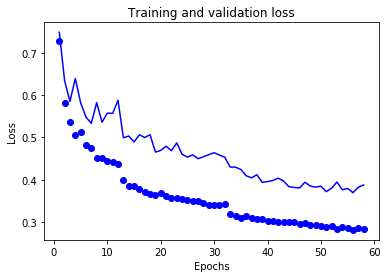

In [23]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

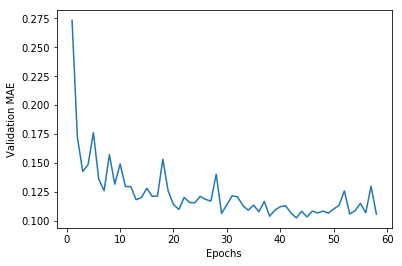

In [24]:
mae_history = history.history['val_mean_absolute_error']

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

In [25]:
arr_model = build_model()

arr_model.fit(x_train, y_train,
         epochs=39, batch_size=128)

Epoch 1/39
196232/196232 [==============================] - 7s 34us/step - loss: 0.7200 - mean_absolute_error: 0.2228
Epoch 2/39
196232/196232 [==============================] - 6s 33us/step - loss: 0.5647 - mean_absolute_error: 0.1739
Epoch 3/39
196232/196232 [==============================] - 6s 33us/step - loss: 0.5419 - mean_absolute_error: 0.1551
Epoch 4/39
196232/196232 [==============================] - 7s 34us/step - loss: 0.5213 - mean_absolute_error: 0.1445
Epoch 5/39
196232/196232 [==============================] - 6s 32us/step - loss: 0.5000 - mean_absolute_error: 0.1405
Epoch 6/39
196232/196232 [==============================] - 6s 32us/step - loss: 0.4890 - mean_absolute_error: 0.1404
Epoch 7/39
196232/196232 [==============================] - 6s 33us/step - loss: 0.4799 - mean_absolute_error: 0.1373
Epoch 8/39
196232/196232 [==============================] - 7s 33us/step - loss: 0.4756 - mean_absolute_error: 0.1363
Epoch 9/39
196232/196232 [==============================

In [26]:
results = arr_model.evaluate(x_test, y_test)
predictions = arr_model.predict(x_test)
r2 = r2_score(y_test,predictions)

84100/84100 [==============================] - ETA:  - 3s 33us/step


In [27]:
results[0]

0.42963789807244424

In [28]:
predicted_df = pd.DataFrame(predictions,columns=['Predicted Error'])

In [29]:
# stand_feat = pd.DataFrame(x_test,columns=flight_data.columns[:-1])

In [30]:
unstand_predict = (predicted_df * stdE) + meanE
unstand_predict.head()

,Predicted Error
0,-0.047355
1,-2.543971
2,1.325662
3,-0.204443
4,-24.187508


In [31]:
test_df = pd.DataFrame(y_test,columns=['True Error'])
unstand_test = (test_df * stdE) + meanE
unstand_test.head()

,True Error
0,2.0
1,-5.0
2,1.0
3,-1.0
4,-4.0


In [32]:
print(r2)

0.6180483266678646
